In [63]:
import numpy as np 
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import seaborn as sns 

# Plotly 
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf
init_notebook_mode(connected=True)

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, word_tokenize

from collections import defaultdict

from lazypredict.Supervised import LazyClassifier

import imblearn

In [2]:
df = pd.read_csv('../data/processed/tanishq_data_clean_labelled.csv')
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1)
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()
df['clean_tweet_token'] = df['clean_tweet_segmented'].apply(lemmatizer.lemmatize).apply(tokenizer.tokenize)
df['clean_tweet_token'] = df['clean_tweet_token'].str.join(' ')
df = df[['clean_tweet_token', 'sentiment']]
df.dropna(inplace=True)
df = df[df['sentiment'].isin([0.0, 4.0])]
df['sentiment'] = df['sentiment'].replace({4.0: 1})

In [3]:
count_vec = CountVectorizer()
X_count_vec = count_vec.fit_transform(df['clean_tweet_token'])

In [4]:
tfidf_vec = TfidfVectorizer(ngram_range=(1, 3))
X_tfidf_vec = tfidf_vec.fit_transform(df['clean_tweet_token'])

In [5]:
# Before oversampling
pca_count_vec = PCA(n_components=2).fit_transform(X_count_vec.toarray())
pca_tfidf_vec = PCA(n_components=2).fit_transform(X_tfidf_vec.toarray())
df_count_vec = pd.DataFrame(pca_count_vec)
df_count_vec.columns = ['X1', 'X2']
df_count_vec['labels'] = df['sentiment']

df_tfidf_vec = pd.DataFrame(pca_tfidf_vec)
df_tfidf_vec.columns = ['X1', 'X2']
df_tfidf_vec['labels'] = df['sentiment']

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

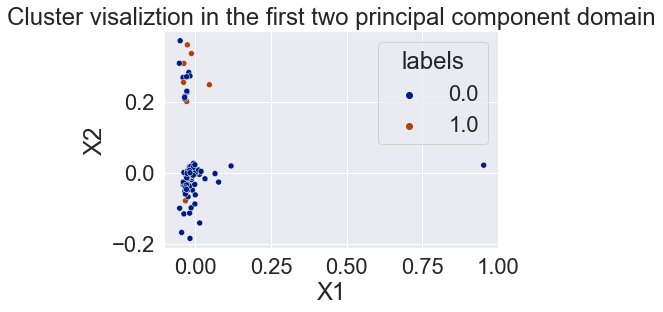

In [6]:
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue='labels', 
    data=df_tfidf_vec, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

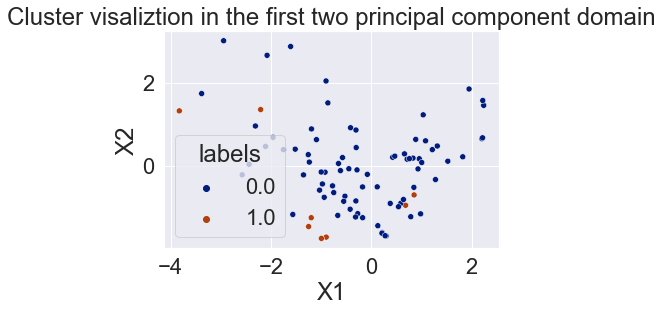

In [7]:
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue='labels', 
    data=df_count_vec, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")

In [8]:
# Oversampling 
oversample = imblearn.over_sampling.SMOTE()
X_count_vec_smote, y_count_vec_smote = oversample.fit_resample(X_count_vec, df['sentiment'])
X_tfidf_vec_smote, y_tfidf_vec_smote = oversample.fit_resample(X_tfidf_vec, df['sentiment'])

In [12]:
pca_count_vec = PCA(n_components=2).fit_transform(X_count_vec_smote.toarray())
pca_tfidf_vec = PCA(n_components=2).fit_transform(X_tfidf_vec_smote.toarray())
df_count_vec = pd.DataFrame(pca_count_vec)
df_count_vec.columns = ['X1', 'X2']
df_count_vec['labels'] = y_count_vec_smote

df_tfidf_vec = pd.DataFrame(pca_tfidf_vec)
df_tfidf_vec.columns = ['X1', 'X2']
df_tfidf_vec['labels'] = y_tfidf_vec_smote

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

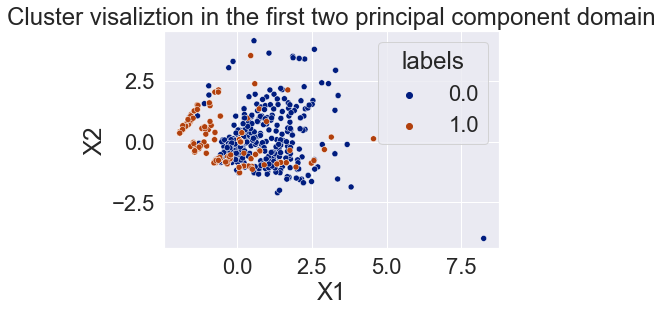

In [13]:
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue='labels', 
    data=df_count_vec, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

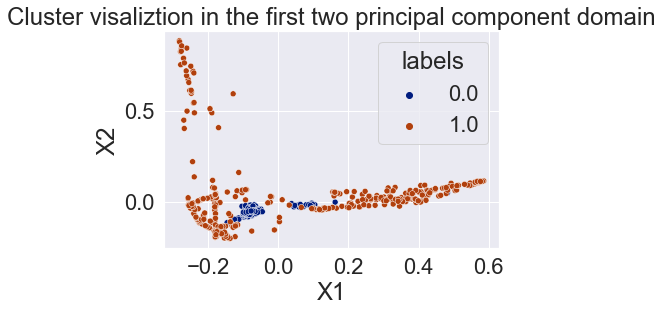

In [14]:
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue='labels', 
    data=df_tfidf_vec, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")

### TFIDF is not a viable strategy for our particular problem. In the interest of brevity, we will focus on the count vectorizer hereafter. 

In [15]:
def process_smote(X=None, y=None, sampling=None):
    X, y = sampling.fit_resample(X, y)
    pca = PCA(n_components=2).fit_transform(X.toarray())
    df = pd.DataFrame(pca)
    df.columns = ['X1', 'X2']
    df['labels'] = y
    return X, y, df

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

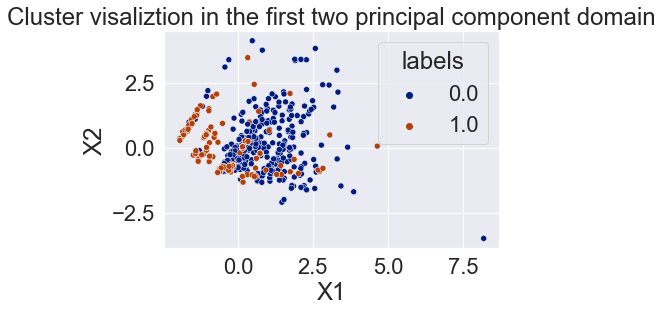

In [17]:
# SMOTE
sampling = imblearn.over_sampling.SMOTE()
X_smote, y_smote, df_smote = process_smote(X=X_count_vec, y=df['sentiment'], sampling=sampling) 
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue='labels', 
    data=df_smote, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

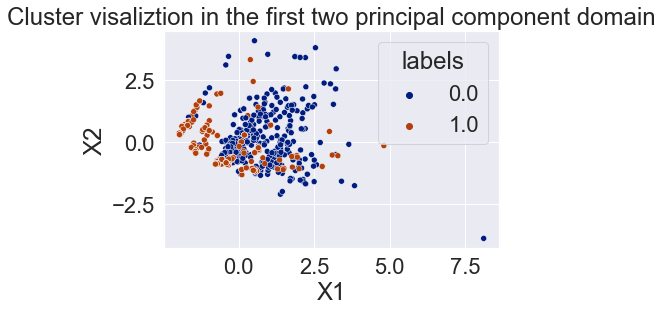

In [22]:
# ADASYN
sampling = imblearn.over_sampling.ADASYN(random_state=120)
X_ada, y_ada, df_ada = process_smote(X=X_count_vec, y=df['sentiment'], sampling=sampling) 
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue='labels', 
    data=df_ada, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

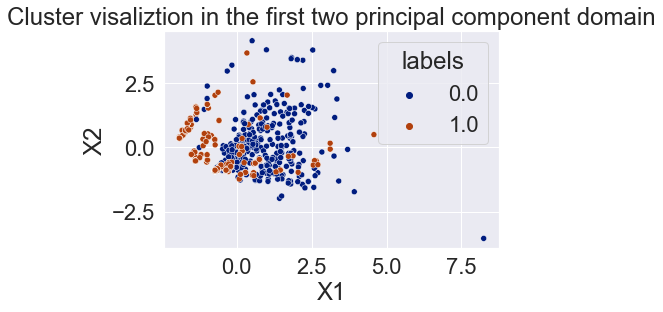

In [24]:
# SMOTETomek
sampling = imblearn.combine.SMOTETomek(random_state=42)
X_smotetomek, y_smotetomek, df_smotetomek = process_smote(X=X_count_vec, y=df['sentiment'], sampling=sampling) 
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue='labels', 
    data=df_smotetomek, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

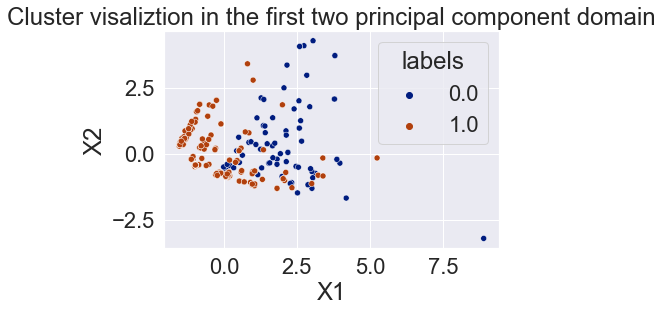

In [25]:
# SMOTETomek
sampling = imblearn.combine.SMOTEENN()
X_smoteenn, y_smoteenn, df_smoteenn = process_smote(X=X_count_vec, y=df['sentiment'], sampling=sampling) 
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue='labels', 
    data=df_smoteenn, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")

In [35]:
def process_lazypredict(X=None, y=None):
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    return models

In [37]:
# SmoteEnn model performance
models_smoteenn = process_lazypredict(X=X_smoteenn.toarray(), y=y_smoteenn)

100%|██████████| 30/30 [00:03<00:00,  9.15it/s]


In [40]:
models_smoteenn

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.98,0.99,0.99,0.98,0.05
SVC,0.97,0.98,0.98,0.97,0.11
LinearSVC,0.97,0.98,0.98,0.97,0.18
QuadraticDiscriminantAnalysis,0.96,0.98,0.98,0.96,0.10
LabelPropagation,0.93,0.96,0.96,0.94,0.05
LabelSpreading,0.93,0.96,0.96,0.94,0.04
ExtraTreesClassifier,0.97,0.93,0.93,0.97,0.17
GaussianNB,0.93,0.91,0.91,0.93,0.05
AdaBoostClassifier,0.95,0.89,0.89,0.95,0.29


In [68]:
fig = px.bar(models_smoteenn.reset_index(), x='Model', y='ROC AUC', color='Model', color_discrete_sequence=px.colors.qualitative.Dark24_r)
fig.show()

In [66]:
#defining list_updatemenus
models_smoteenn = models_smoteenn.reset_index()
list_updatemenus = [{'label': 'ROC AUC',
  'method': 'update',
  'args': [{'visible': [True, False]}, {'title': 'ROC AUC'}]},
 {'label': 'Accuracy',
  'method': 'update',
  'args': [{'visible': [False, True]}, {'title': 'Accuracy'}]}]
#defining data
data = [go.bar(x=models_smoteenn["Model"], y=models_smoteenn["ROC AUC"], name='ROC AUC'),
        go.bar(x=models_smoteenn["Model"], y=models_smoteenn["Accuracy"], name='Accuracy', opacity=0.5),
       ]
#defining layout
layout=go.Layout(title='Performance Metric for Different Classifiers', updatemenus=list([dict(buttons= list_updatemenus)]), barmode='overlay')
#defining figure and plotting
fig = go.Figure(data, layout)
iplot(fig)

TypeError: 'module' object is not callable